In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

snr_ranges = ['-15dB', '-10dB', '-5dB', '0dB', '5dB', '10dB', '15dB', '20dB', '25dB', '30dB']



In [30]:
# Initialize dictionaries to store results
NMSE_mean_dict = {}
NMSE_std_dict = {}
BER_mean_dict = {}

# Process each SNR value
for snr in snr_ranges:
    # Read the corresponding CSV file
    df = pd.read_csv(f'data/results_snr_{snr}.csv')
    
    # Calculate statistics
    NMSE_mean_dict[snr] = df['nmse'].mean()
    NMSE_std_dict[snr] = df['nmse'].std()
    BER_mean_dict[snr] = df['ber'].mean()

# Convert to sorted lists if needed for plotting
snr_sorted = sorted(NMSE_mean_dict.keys())
NMSE_means = [NMSE_mean_dict[snr] for snr in snr_sorted]
NMSE_stds = [NMSE_std_dict[snr] for snr in snr_sorted]
BER_means = [BER_mean_dict[snr] for snr in snr_sorted]

In [31]:
BER_means

[nan,
 nan,
 nan,
 nan,
 0.00075,
 0.0011250000000000001,
 0.00038888888888886664,
 0.0003333333333333,
 nan,
 0.00125]

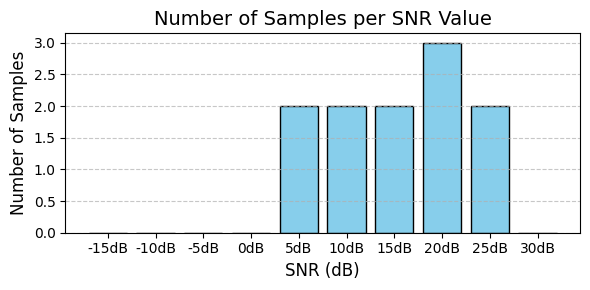

In [32]:
# Create a dictionary to store the count of rows for each SNR
row_counts = {}

# Count rows for each SNR value
for snr in snr_ranges:
    df = pd.read_csv(f'data/results_snr_{snr}.csv')
    row_counts[snr] = len(df)

# Create histogram
plt.figure(figsize=(6, 3))
plt.bar(list(row_counts.keys()), list(row_counts.values()), 
        color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Number of Samples per SNR Value', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.tight_layout()
plt.show()

In [33]:
NMSE_mean_dict, NMSE_std_dict, BER_mean_dict

({'-15dB': nan,
  '-10dB': nan,
  '-5dB': nan,
  '0dB': nan,
  '5dB': -8.27778654670245,
  '10dB': -8.54815651069216,
  '15dB': -8.519845244742196,
  '20dB': -8.953937490413429,
  '25dB': -8.638089780953873,
  '30dB': nan},
 {'-15dB': nan,
  '-10dB': nan,
  '-5dB': nan,
  '0dB': nan,
  '5dB': 0.02289646823448941,
  '10dB': 0.018532524212231907,
  '15dB': 0.07948380837151695,
  '20dB': 0.1330099057659572,
  '25dB': 0.10797086355740527,
  '30dB': nan},
 {'-15dB': nan,
  '-10dB': nan,
  '-5dB': nan,
  '0dB': nan,
  '5dB': 0.00125,
  '10dB': 0.00075,
  '15dB': 0.0011250000000000001,
  '20dB': 0.00038888888888886664,
  '25dB': 0.0003333333333333,
  '30dB': nan})

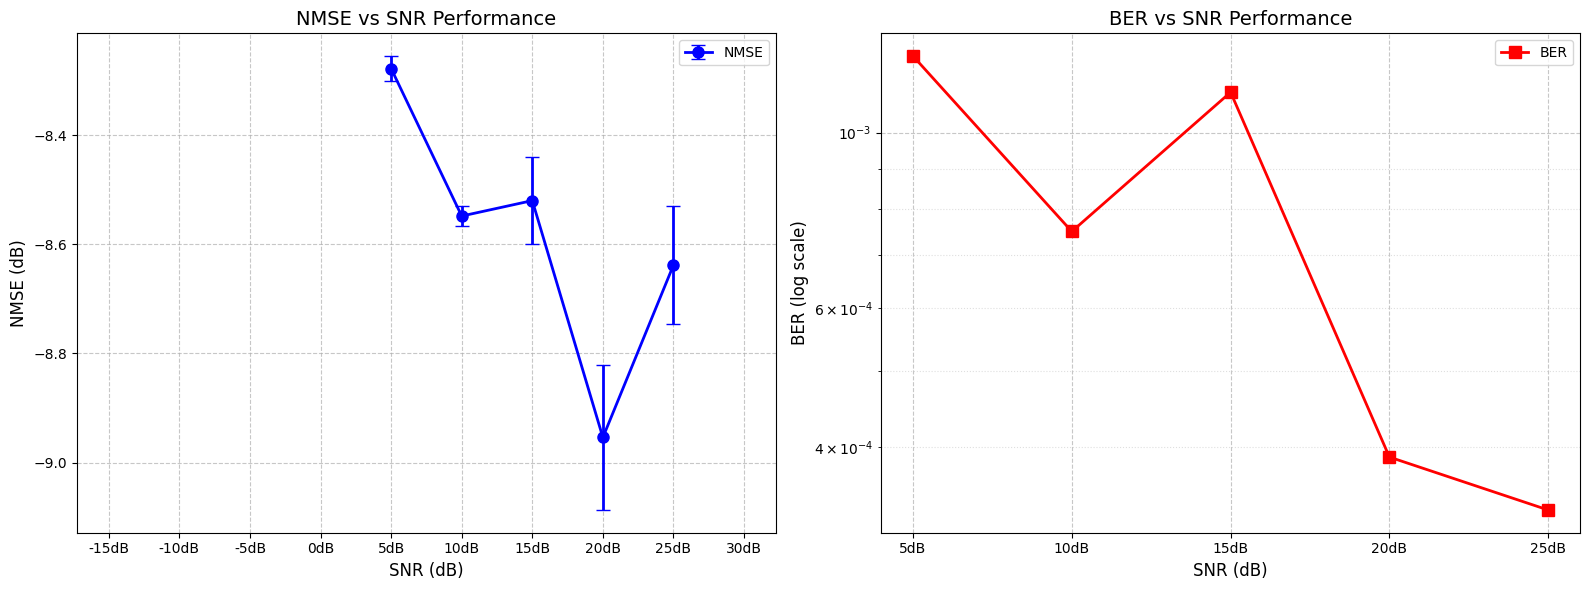

In [34]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

snr = list(NMSE_mean_dict.keys())
nmse = list(NMSE_mean_dict.values())
nmse_std = list(NMSE_std_dict.values())
ber = list(BER_mean_dict.values())

# Plot NMSE with std dev error bars
ax1.errorbar(snr, nmse, 
             yerr=nmse_std,
             marker='o', linestyle='-', linewidth=2, markersize=8,
             color='blue', label='NMSE', capsize=5)
ax1.set_xlabel('SNR (dB)', fontsize=12)
ax1.set_ylabel('NMSE (dB)', fontsize=12)
ax1.set_title('NMSE vs SNR Performance', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.grid(True, which='minor', linestyle=':', alpha=0.4)
ax1.legend()

# Plot BER without error bars
ax2.semilogy(snr, ber,  # Changed to semilogy for logarithmic y-axis
         marker='s', linestyle='-', linewidth=2, markersize=8,
         color='red', label='BER')
ax2.set_xlabel('SNR (dB)', fontsize=12)
ax2.set_ylabel('BER (log scale)', fontsize=12)  # Updated label to indicate log scale
ax2.set_title('BER vs SNR Performance', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.grid(True, which='minor', linestyle=':', alpha=0.4)
ax2.legend()

plt.tight_layout()
plt.show()